### Shivamshan SIVANESAN  
### Kishanthan KINGSTON  
### M1 - ISI - Groupe 2  
### Traitement des Images

# Projet : Brain Mapping avec contour actif (SNAKE)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour
from skimage.draw import circle_perimeter
import matplotlib.pyplot as plt
from skimage import filters, color
from skimage.filters import gaussian
from skimage.filters import sobel_v, sobel_h

import os
import sys
from scipy.ndimage import sobel
import pylab as plb
import matplotlib.cm as cm
from PIL.Image import *
from itertools import product

from ActiveContour import activeContourFromCircle

# Première Fonction  

Nous utilison ici la commande déjà existante de la bibliothèque skimage pour visualiser l'effet des  coefficients tels que $\alpha$, $\beta$, $w_{line}$ et $w_{edge}$.  
 - $\alpha$ contrôle l’élasticité du contour actif, c’est-à-dire sa capacité à se déformer et  à s’adapter aux contours de l’image.
 - $\beta$ contrôle l’adhérence du contour actif aux contours de l’image, c’est-a-dire sa capacité à suivre les contours.
 - $w_{line}$ contrôle l’importance e la similarité de la couleur des pixels le long du contour actif.
 - $w_{edge}$ contrôle l’importance de la similarité des gradients des pixels le long du contour actif. 
<br>

  
Pour tester, on utilise cette fonction sur les IRM qui conriennet une tumeur.

In [2]:
# Cette fonction effectue la détection de contour à l'aide de la méthode Active Contour Snake.
# Elle prend en entrée l'image et l'emplacement initial du contour.
# Elle retourne les points du contour optimisés.

def ContourActif(loc, init_contour,alpha,beta,gamma,w_lin,w_edge):
    image = cv2.imread(loc)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 9)
    ax1.imshow(image)
    ax1.set_title("Image originale")

    # Conversion en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Prétraitement de l'image
    sigma = 1
    img_smooth = gaussian(gray, sigma)

    # Définition du contour initial
    init_snake = np.array(init_contour).astype(float)

    # Fonction d'énergie
    def _energy(image, smooth_image, contour):
        # Energie interne
        internal_energy = alpha * np.sum((contour[2:] - 2 * contour[1:-1] + contour[:-2]) ** 2)

        # Energie externe
        # Energie de contour
        contour_energy = w_line * np.sum((image[contour[:, 0].astype(int), contour[:, 1].astype(int)] - 1) ** 2)
        # Energie de bord
        gradient_x = sobel_v(smooth_image)
        gradient_y = sobel_h(smooth_image)
        edge_energy = w_edge * np.sum((gradient_x[contour[:, 0].astype(int), contour[:, 1].astype(int)]) ** 2 +
                                      (gradient_y[contour[:, 0].astype(int), contour[:, 1].astype(int)]) ** 2)

        # Energie totale
        total_energy = gamma * np.sum((contour[1:] - contour[:-1]) ** 2)
        return internal_energy + contour_energy + edge_energy + total_energy

    # Optimisation du contour
    snake = active_contour(img_smooth, init_snake, alpha=alpha, beta=beta, gamma=gamma, w_line=w_line, w_edge=w_edge)
    cv2.drawContours(image, [snake.astype(int)], 0, (0, 0, 255), 4)
    ax2.imshow(image)
    ax2.set_title("Image après contour actif")
    plt.show()

In [3]:
# Rayon du cercle
radius = 50

# Centre du cercle
center = (275, 210)

# Création des coordonnées du cercle
rr, cc = circle_perimeter(center[0], center[1], radius)

# Conversion des coordonnées en un tableau de points
circle = np.column_stack((rr, cc))

# Différents coefficients
alpha = 0.1
beta = 1
gamma = 0.001
w_line = 30
w_edge = 20

alpha2 = 10
beta2 = 1
gamma2 = 0.001
w_line2 = 30
w_edge2 = 20

alpha3 = 0.1
beta3 = 10
gamma3 = 0.001
w_line3 = 30
w_edge3 = 20

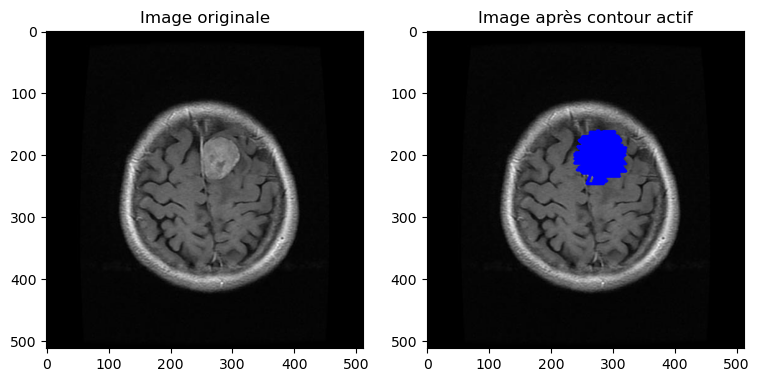

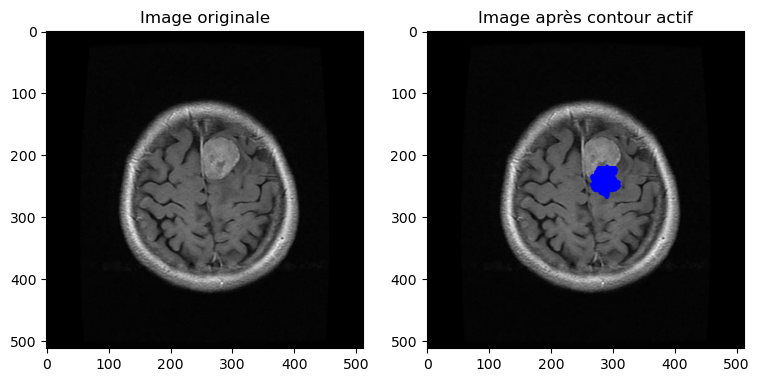

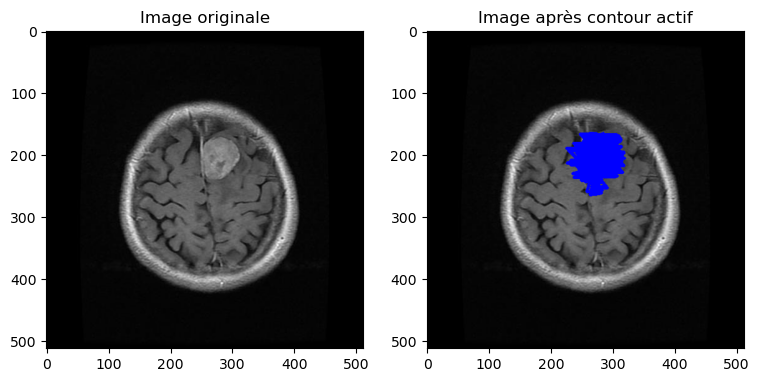

None
None
None


In [4]:
plot1 = ContourActif('tumeur.jpg', circle,alpha,beta,gamma,w_line,w_edge)
plot2 = ContourActif('tumeur.jpg', circle,alpha2,beta2,gamma2,w_line2,w_edge2)
plot3 = ContourActif('tumeur.jpg', circle,alpha3,beta3,gamma3,w_line3,w_edge3)
print(plot1)
print(plot2)
print(plot3)

Ici, nous constatons pour la première image avec un $\alpha$ petit que le contour englobe toute la partie du cerveau qui contient la tumeur mais en même temps il entoure la partie saine aussi. Avec un $\alpha$ grand (deuxième image), le contour que nous obtenons n'est pas bon. Il a du mal à s'adapter aux contours de la partie tumeur. Avec un $\beta$ grand, le contour s'adapte bien au zone mais il englobe aussi la partie saine.  
Nous allons garder les premiers coefficients et les tester avec d'autres images.

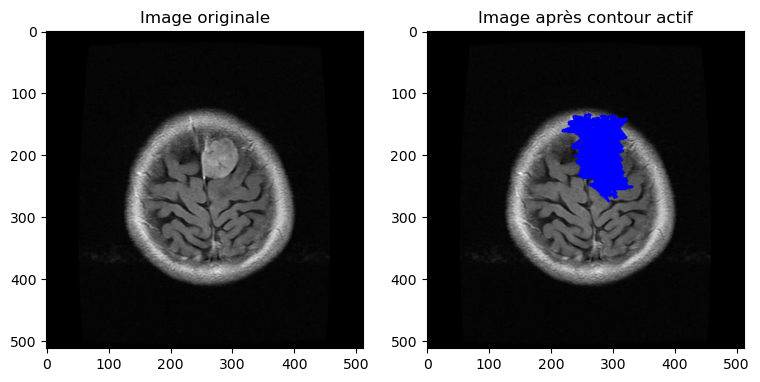

In [5]:
ContourActif('tumeur2.jpg', circle,alpha,beta,gamma,w_line,w_edge)

Avec une autre image, elle ne marche plus. 

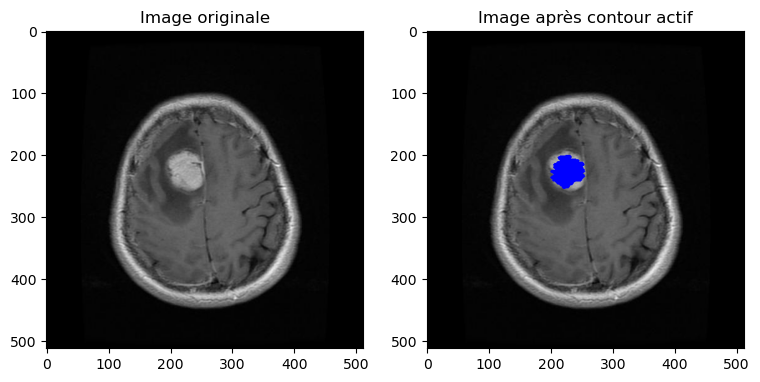

In [6]:
ContourActif('tumeur3.jpg', circle,alpha,beta,gamma,w_line,w_edge)

Ici, on arrive à faire un contour mais la fonction n'englobe pas toute la partie.  

Essayons maintenant cette fonction pour faire un contour du cerveau.

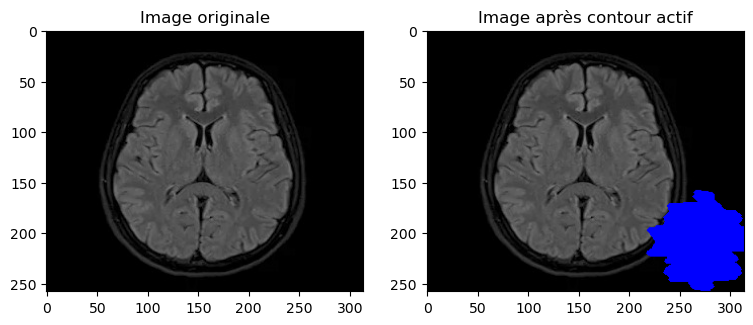

In [7]:
ContourActif('Cortex3.jpg', circle,alpha,beta,gamma,w_line,w_edge)

Comme nous avons fixé là haut notre centre de cercle, le contour ne se fait pas au bon endroit. Essayons de modifier le centre.

In [8]:
# Rayon du cercle
radius2 = 50

# Centre du cercle
center2 = (150, 125)

# Création des coordonnées du cercle
rr2, cc2 = circle_perimeter(center2[0], center2[1], radius2)

# Conversion des coordonnées en un tableau de points
circle2 = np.column_stack((rr2, cc2))

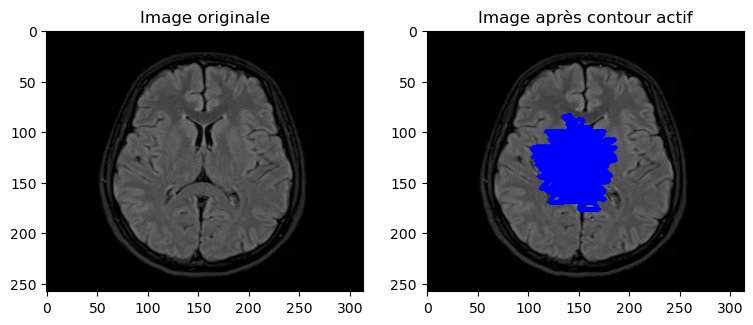

In [9]:
ContourActif('Cortex3.jpg', circle2,alpha,beta,gamma,w_line,w_edge)

Ici, nous constatons que la commande active_contour de skimage essaie d'englober tout le cerveau mais ce n'est pas ce que nous souhaitons. Nous voulons que notre fonction nous donne un contour du cerveau.  Pour cela, nous avons élaboré une fonction avec d'autres fonctions que nous avosn repris de certains dépôts GitHub et nous les avons modifier pour que ça marche avec nos IRM du cortex. Voir le fichier ActiveContour.py pour voir les fonctions.

Voir ci dessous les liens GitHub (Section Bibliographie).

# Algorithme Snake  

Il faudra fournir au programme la localisation de l'image, le centre de l'image ainsi que le rayon du contour souhaité.

Image size:  (258, 314)
Min energy reached at  inf
Final smooth factor  35


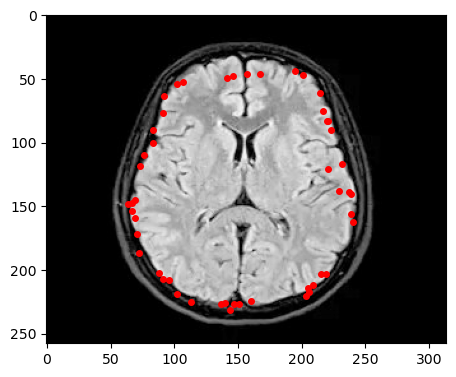

In [10]:
activeContourFromCircle("Cortex3.jpg", (150, 150), 100)

Image size:  (262, 236)
Min energy reached at  inf
Final smooth factor  35


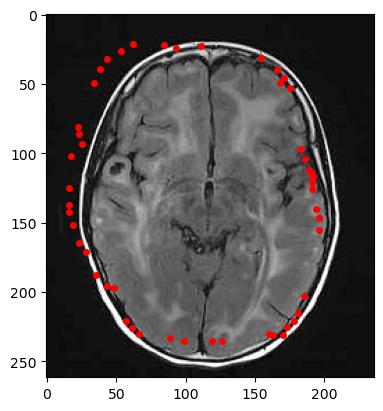

In [11]:
activeContourFromCircle("Cortex4.jpg", (125, 150), 100)

Image size:  (231, 236)
Min energy reached at  inf
Final smooth factor  35


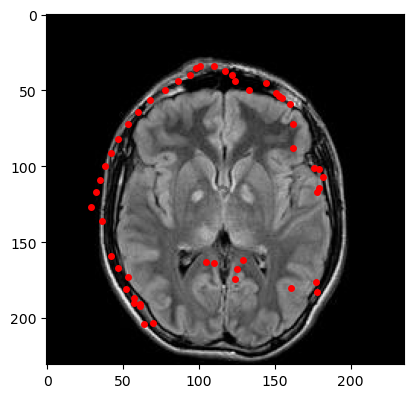

In [12]:
activeContourFromCircle("Cortex2.jpg", (100, 100), 90)

Image size:  (260, 236)
Min energy reached at  inf
Final smooth factor  35


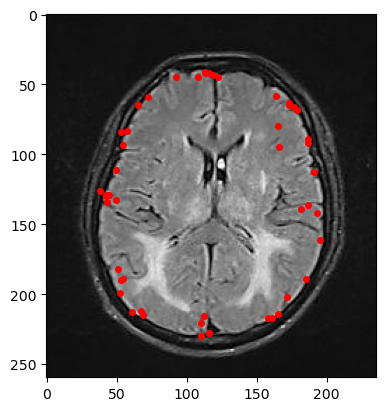

In [13]:
activeContourFromCircle("Cortex.jpg", (110, 125), 100)

# Bibliographie:

A. M. Alattar and M. A. H. Oudah. (2017), An Adaptive Active Contour Model for Building Extraction from Aerial Images, Palestinian International Conference on Information and Communication Technology (PICICT), Gaza, Palestine, pp. 103-109. https://doi.org/10.1109/PICICT.2017.22.

Tae, W.-S., Kang, S.-H., Ham, B.-J., Kim, B.-J., & Pyun, S.-B. (2016). Brain Mapping Using Neuroimaging. Applied Microscopy, 46(4), 179–183. https://doi.org/10.9729/AM.2016.46.4.179

Mat Ibrahim, M., Ibrahim, M. M., Soraghan, J. S., & Manap, N. A. (2014). Iris Localisation Using Fuzzy Centre Detection (FCD) Scheme and Active Contour Snake. Jurnal Teknologi, 69(6). https://doi.org/10.11113/JT.V69.3244

Rabeh, A. B., Benzarti, F., & Amiri, H. (2017). Segmentation of brain MRI using active contour model. International Journal of Imaging Systems and Technology, 27(1), 3–11. https://doi.org/10.1002/IMA.22205

Connelly, K. (2009). Segmentation of Left Ventricle in Cardiac Cine MRI: An Automatic Image-Driven Method. Lecture Notes in Computer Science.

Wang, Z., Li, Y., Childress, A. R., & Detre, J. A. (2014). Brain Entropy Mapping Using fMRI. PLoS ONE, 9(3), e89948. https://doi.org/10.1371/JOURNAL.PONE.0089948

Sharma, A. (2020). Brain Region Segmentation using Low MSE based Active Contour Model and Convolutional Neural Network. International Journal of Advanced Trends in Computer Science and Engineering, 9(2), 1848–1853. https://doi.org/10.30534/IJATCSE/2020/144922020

V. Monaco, "Active-Contour," GitHub. [Online]. Available: https://github.com/vmonaco/active-contour. [Accessed: Apr. 11, 2023].

"scikit-image/scikit-image/skimage/segmentation/active_contour_model.py," GitHub. [Online]. Available: https://github.com/scikit-image/scikit-image/blob/main/skimage/segmentation/active_contour_model.py. [Accessed: Apr. 11, 2023].

M. Mayr, "SnakeActiveContour/Code," GitHub. [Online]. Available: https://github.com/MMayr96/SnakeActiveContour/tree/master/Code. [Accessed: Apr. 11, 2023].

A. Shaw, "Snakes-in-a-Plane/snakes.py," GitHub. [Online]. Available: https://github.com/brikeats/Snakes-in-a-Plane/blob/master/snakes.py. [Accessed: Apr. 11, 2023].